In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SELLER P&L ANALYSIS

The goal of this exercise is to compute, for each `seller_id`:

- The **revenue** it brings (10% of each sales + 80 BRL per month)
- The **cost** associated with all its bad reviews (1-star = 100 BRL, 2-star = 50, 3-star=40)
- The resulting **profit** made by Olist for each seller

❓ Let's not start all again from scratch! Import your seller training set and investigate what you already have.


In [1]:
from olist.seller import Seller

In [2]:
# Thanks to autoreload, a new instance of Seller benefits from the latest update in seller.py
sellers = Seller().get_training_data()

In [21]:
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,review_cost,n_orders,quantity,quantity_per_order,sales,revenue,profit
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000,167.99,16.799,-83.201


❓ What is missing? Write down a strategy to get your missing columns, by re-using as much of  what has already been coded in `seller.py` as possible

In [ ]:
# Revenue: Sum overall sales of seller, apply subscription to number of months of activity

# Review Cost: Associate review cost to orders and sum by seller

# Profit: Difference of Revenue and Review Cost

❓ Update `seller.py` accordingly

In [7]:
# Modify method below to return review cost of seller

def get_review_score(self=Seller()):

    matching_table = self.matching_table
    orders_reviews = self.order.get_review_score()
    matching_table = matching_table[['order_id', 'seller_id']].drop_duplicates()
    df = matching_table.merge(orders_reviews, on='order_id')

    # Map review with cost
    costs = {1: 100,
             2: 50,
             3: 40,
             4: 0,
             5: 0}
    
    # Get review cost for each order
    df["review_cost"] = df["review_score"].map(costs)
    
    df = df.groupby('seller_id',
                    as_index=False).agg({'dim_is_one_star': 'mean',
                                         'dim_is_five_star': 'mean',
                                         'review_score': 'mean',
                                         'review_cost': 'sum'}) # add agg for review cost
    
    df.columns = ['seller_id', 'share_of_one_stars',
                  'share_of_five_stars', 'review_score', 'review_cost'] # add new column name

    return df

In [8]:
get_review_score()

,seller_id,share_of_one_stars,share_of_five_stars,review_score,review_cost
0,0015a82c2db000af6aaaf3ae2ecb0532,0.333333,0.666667,3.666667,100
1,001cca7ae9ae17fb1caed9dfb1094831,0.130000,0.520000,3.950000,3800
2,001e6ad469a905060d959994f1b41e4f,1.000000,0.000000,1.000000,100
3,002100f778ceb8431b7a1020ff7ab48f,0.134615,0.519231,3.903846,1110
4,003554e2dce176b5555353e4f3555ac8,0.000000,1.000000,5.000000,0
...,...,...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000,0.000000,1.000000,100
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,0.055556,0.666667,4.333333,190
3092,ffeee66ac5d5a62fe688b9d26f83f534,0.142857,0.642857,4.214286,200
3093,fffd5413c0700ac820c7069d66d98c89,0.183333,0.550000,3.866667,1360


❓ Compute seller profits

In [12]:
# Handy for storing params
from dotmap import DotMap

In [18]:
# Modify method below to return revenue, cost and profit of seller

def get_training_data(self=Seller()):
        """
        Returns a DataFrame with:
        'seller_id', 'seller_state', 'seller_city', 'delay_to_carrier',
        'wait_time', 'share_of_five_stars', 'share_of_one_stars',
        'seller_review_score', 'n_orders', 'quantity,' 'date_first_sale', 'date_last_sale', 'sales'
        """

        training_set =\
            self.get_seller_features()\
                .merge(
                self.get_seller_delay_wait_time(), on='seller_id'
               ).merge(
                self.get_active_dates(), on='seller_id'
               ).merge(
                self.get_review_score(), on='seller_id'
               ).merge(
                self.get_quantity(), on='seller_id'
               ).merge(
                self.get_sales(), on='seller_id'
               )
        
        # Set parameters
        config = DotMap({"sales": 0.1, "subscription": 80})
        
        # Compute Revenue, fees on sales + subscriptions
        training_set["revenue"] = training_set["sales"] * config.sales \
                                    + training_set["months_on_olist"] * config.subscription
        
        # Compute Profit, revenue - cost
        training_set["profit"] = training_set["revenue"] - training_set["review_cost"]
        
        return training_set

In [19]:
get_training_data()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,review_cost,n_orders,quantity,quantity_per_order,sales,revenue,profit
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000000,167.99,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2966,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2967,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2968,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,349.700,299.700


❓ Sort sellers by profit, and analyse their profitability: conclude on a possible strategy for Olist!

In [3]:
# Get indicators
s = sellers[["n_orders" ,"review_cost", "revenue", "profit"]]

<AxesSubplot:>

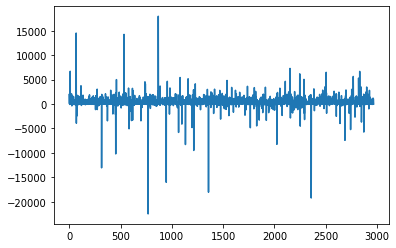

In [4]:
# This gives little information, as the data is sorted by index
s.profit.plot()

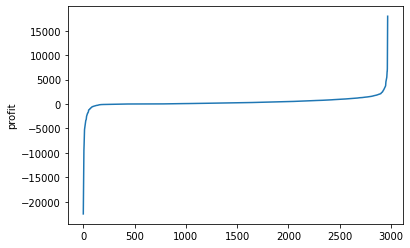

In [7]:
# Sorting by Profit gives a lot more information
df = s.sort_values(by="profit").reset_index(drop=True)
sns.lineplot(data=df.profit);

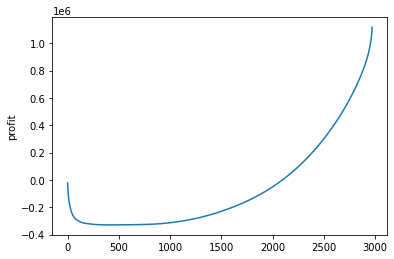

In [14]:
# Then can use a cumulative sum 
sns.lineplot(data=df.profit.cumsum());

In [8]:
df.describe()

,n_orders,review_cost,revenue,profit
count,2970.000000,2970.000000,2970.000000,2970.000000
mean,33.617508,562.131313,938.213880,376.082567
std,107.133714,1941.000427,1660.107616,1276.183916
min,1.000000,0.000000,0.650000,-22499.517000
25%,2.000000,0.000000,119.946750,19.892500
50%,7.000000,100.000000,460.221000,250.859500
75%,23.000000,380.000000,1183.160250,676.667750
max,1854.000000,40890.000000,24387.263000,17967.605000


In [9]:
# Nice tool for jupyter only data exploration
!pip install -q ipywidgets
from ipywidgets import interact

In [13]:
# Decorator, args should be the same as the method it decorates, they store possible values.
@interact(display=["profit", "n_orders", "review_cost"], sort_by=["profit", "n_orders"],  hide_lower=[0, 1, 2, 3])
def plot(display, sort_by, hide_lower):
    '''
    ---Parameters---
    display: variable to display
    sort_by: variable used to sort the dataframe, ascending
    hide_lower: filter out values which are within this number of standard deviation from their mean
    '''
    df = s.sort_values(by=sort_by).reset_index(drop=True)
    
    if hide_lower:
        df = df[abs(df[display]) > hide_lower * df[display].std() + df[display].mean()]
    
    fig = plt.figure(figsize=(30, 16))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
    
    scatter = fig.add_subplot(grid[0, 0])
    cumsum = fig.add_subplot(grid[0, 1])
    hist = fig.add_subplot(grid[1, :2])
    
    if display == sort_by:
        sns.lineplot(data=df[display], ax=scatter)
    else:
#         sns.scatterplot(data=df[[display]], ax=scatter)
        sns.scatterplot(data=df, x=sort_by, y=display, ax=scatter)
        
    sns.lineplot(data=df[display].cumsum(), ax=cumsum)
    sns.histplot(data=df[display], ax=hist)

interactive(children=(Dropdown(description='display', options=('profit', 'n_orders', 'review_cost'), value='pr…